### Problem Statement:

#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Fraud_check.csv']))

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
df.rename({'Undergrad':'ug'},axis=1,inplace=True)
df.rename({'Marital.Status':'marital_status'},axis=1,inplace=True)
df.rename({'Taxable.Income':'taxable_income'},axis=1,inplace=True)
df.rename({'City.Population':'city_population'},axis=1,inplace=True)
df.rename({'Work.Experience':'work_exp'},axis=1,inplace=True)
df.rename({'Urban':'urban'},axis=1,inplace=True)

In [9]:
df.columns

Index(['ug', 'marital_status', 'taxable_income', 'city_population', 'work_exp',
       'urban'],
      dtype='object')

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(600, 6)

In [13]:
len(df)

600

In [14]:
df = df.iloc[:,[0,1,3,4,5,2]]
df.head(2)

,ug,marital_status,city_population,work_exp,urban,taxable_income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700


In [15]:
df.taxable_income.describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: taxable_income, dtype: float64

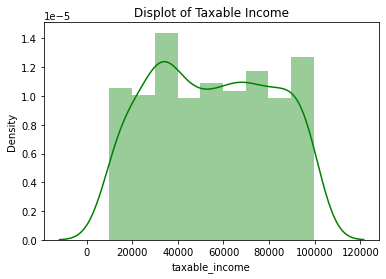

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.taxable_income,kde=True,color='green')
plt.title('Displot of Taxable Income');

In [17]:
import warnings
warnings.filterwarnings('ignore')

df['tax_inc_catg'] = pd.cut(x=df['taxable_income'], bins=[1003,30000,99619], labels=['Risky','Good'],include_lowest=True)
df.head()

,ug,marital_status,city_population,work_exp,urban,taxable_income,tax_inc_catg
0,NO,Single,50047,10,YES,68833,Good
1,YES,Divorced,134075,18,YES,33700,Good
2,NO,Married,160205,30,YES,36925,Good
3,YES,Single,193264,15,YES,50190,Good
4,NO,Married,27533,28,NO,81002,Good


In [18]:
df.tax_inc_catg.value_counts()

Good     476
Risky    124
Name: tax_inc_catg, dtype: int64

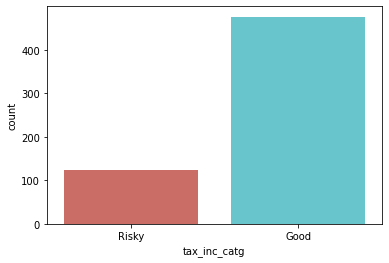

In [19]:
sns.countplot(x='tax_inc_catg',data=df, palette='hls');

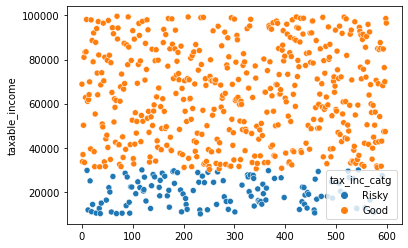

In [20]:
sns.scatterplot(data=df,x=df.index,y='taxable_income',hue='tax_inc_catg');

<font color='peach'>From the above plots we can see there is class imbalance in the target varaiable.

### <font color='maroon'><b>Encode Categorical variables :</b></font>

In [21]:
df_enc = pd.get_dummies(df,columns=['marital_status'],drop_first=True)
df_enc.head()

,ug,city_population,work_exp,urban,taxable_income,tax_inc_catg,marital_status_Married,marital_status_Single
0,NO,50047,10,YES,68833,Good,0,1
1,YES,134075,18,YES,33700,Good,0,0
2,NO,160205,30,YES,36925,Good,1,0
3,YES,193264,15,YES,50190,Good,0,1
4,NO,27533,28,NO,81002,Good,1,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

categ = ['urban','ug']
df_enc[categ] = df[categ].apply(le.fit_transform)
df_enc.head()

,ug,city_population,work_exp,urban,taxable_income,tax_inc_catg,marital_status_Married,marital_status_Single
0,0,50047,10,1,68833,Good,0,1
1,1,134075,18,1,33700,Good,0,0
2,0,160205,30,1,36925,Good,1,0
3,1,193264,15,1,50190,Good,0,1
4,0,27533,28,0,81002,Good,1,0


In [24]:
df_enc.shape

(600, 8)

### <font color='maroon'><b>Split into independent and dependent variables :</b></font>

In [25]:
X = df_enc.drop(['taxable_income','tax_inc_catg'],axis=1)
X.head(3)

,ug,city_population,work_exp,urban,marital_status_Married,marital_status_Single
0,0,50047,10,1,0,1
1,1,134075,18,1,0,0
2,0,160205,30,1,1,0


In [26]:
y = df_enc['tax_inc_catg']

### <font color='maroon'><b>Feature Scaling :</b></font>

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
x = scaler.fit_transform(X)
x

array([[-1.040833  , -1.17852072, -0.62914254,  0.99335541, -0.6912543 ,
         1.32852435],
       [ 0.96076892,  0.50850002,  0.27636996,  0.99335541, -0.6912543 ,
        -0.75271484],
       [-1.040833  ,  1.03310911,  1.63463872,  0.99335541,  1.4466456 ,
        -0.75271484],
       ...,
       [-1.040833  ,  0.90969648, -1.76103318,  0.99335541, -0.6912543 ,
        -0.75271484],
       [ 0.96076892,  1.43219749,  0.1631809 , -1.00668904,  1.4466456 ,
        -0.75271484],
       [-1.040833  ,  0.9915901 ,  0.04999184, -1.00668904, -0.6912543 ,
        -0.75271484]])

### <font color='maroon'><b>Train Test Split :</b></font>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [32]:
y_train.value_counts()

Good     381
Risky     99
Name: tax_inc_catg, dtype: int64

In [33]:
y_test.value_counts()

Good     95
Risky    25
Name: tax_inc_catg, dtype: int64

### <font color='orange'><b>Correct the Imbalanced data with Oversampling using SMOTE algorithm :

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state = 0)

In [36]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [37]:
print("After OverSampling, counts of label 'Good': {}".format(sum(y_train_smote == 'Good')))
print("After OverSampling, counts of label 'Risky': {}".format(sum(y_train_smote == 'Risky')))

After OverSampling, counts of label 'Good': 381
After OverSampling, counts of label 'Risky': 381


## <font color='darkgreen'><b>Decision Tree Classifier :</b></font>

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier(random_state=0)

In [40]:
dtree.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=0)

### <font color='green'><b>Plot Tree</b></font>

In [41]:
from sklearn.tree import plot_tree

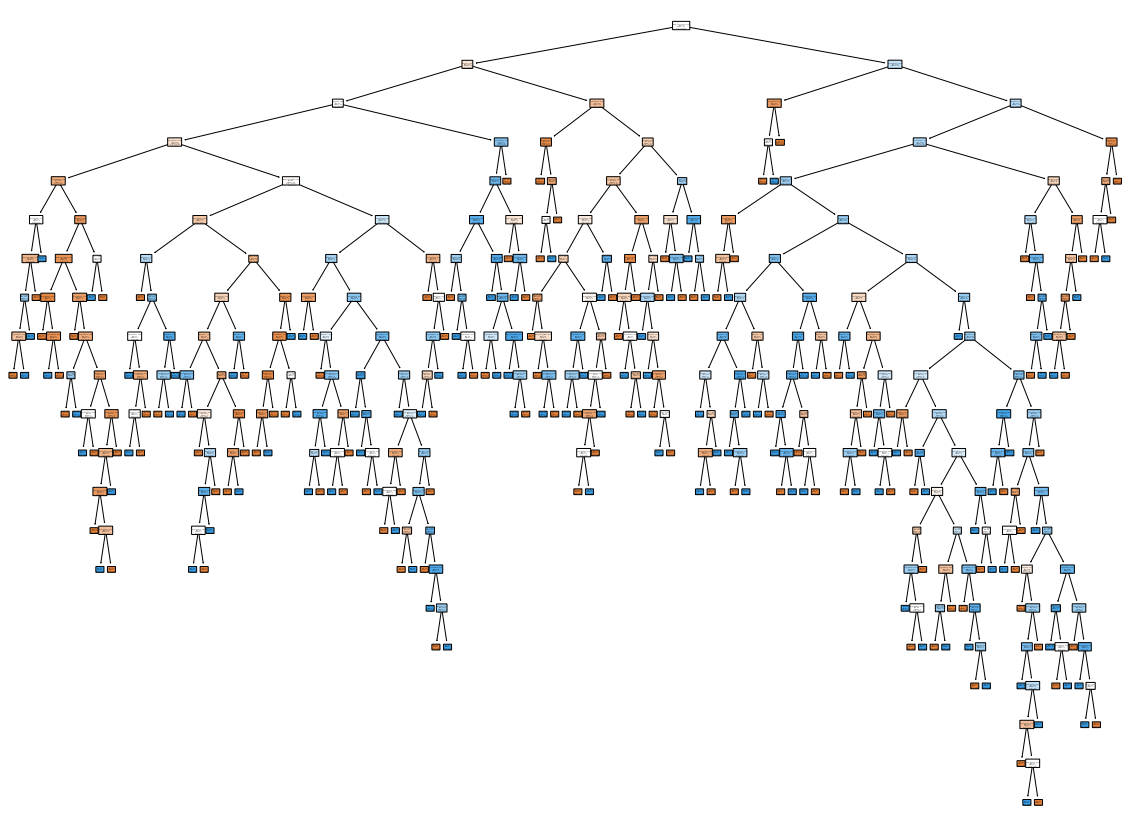

In [42]:
plt.figure(figsize=(20,15))
plot_tree(dtree,feature_names=X.columns,class_names=y.unique(),filled=True,rounded=True);

In [43]:
train_pred = dtree.predict(X_train_smote)

In [44]:
test_pred = dtree.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_train_smote,train_pred)

1.0

In [47]:
accuracy_score(y_test,test_pred)

0.6333333333333333

### <font color='maroon'><b> Grid Search CV</font>

In [74]:
param_dist = {
    'max_depth':[1,2,3,4,5,None],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[2,3,4]
}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid = GridSearchCV(dtree, param_grid=param_dist, cv=10)      # kfold cv where k=10

In [77]:
grid.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [78]:
grid.best_estimator_

DecisionTreeClassifier(random_state=0)

In [79]:
grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [80]:
grid.best_score_

0.6681305536568694

### <font color='green'><b>Pre-Pruning

In [81]:
dtre2 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=0)

In [82]:
dtre2.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=0)

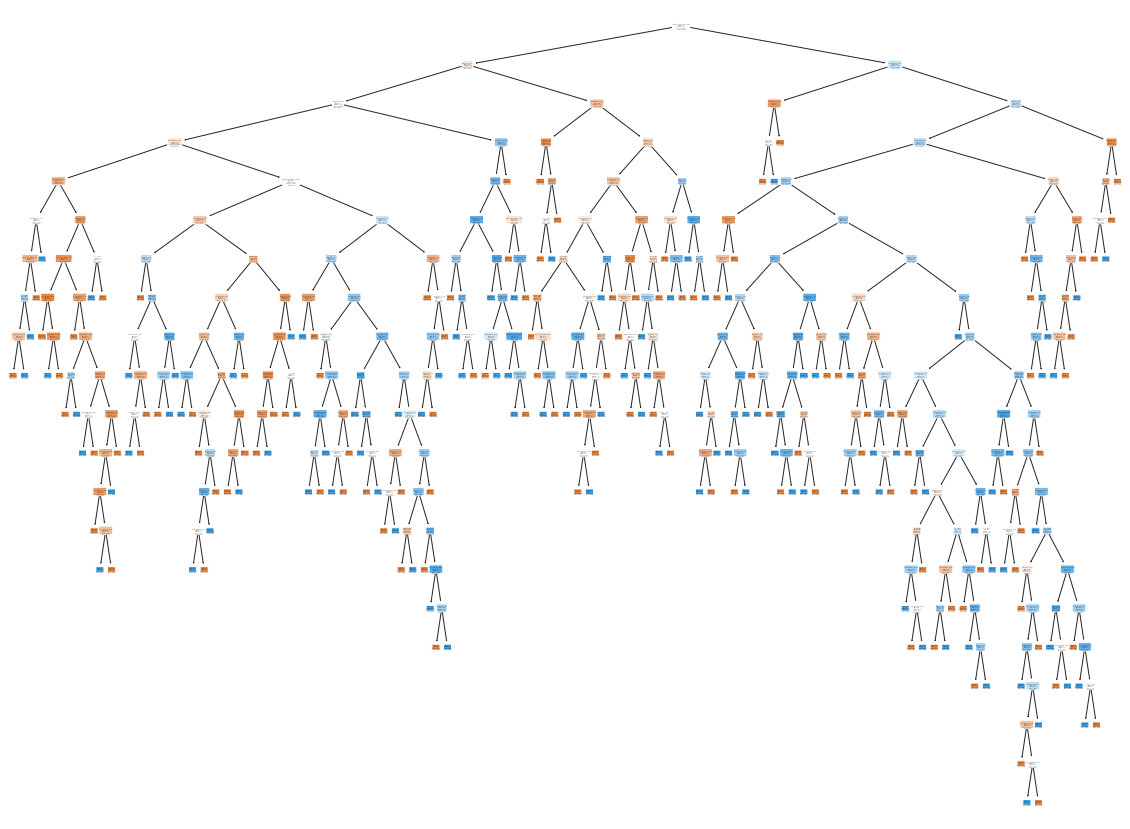

In [91]:
plt.figure(figsize=(20,15))
plot_tree(dtre2,feature_names=X.columns,class_names=y.unique(),filled=True,rounded=True);

In [83]:
train_pred2 = dtre2.predict(X_train_smote)

In [84]:
test_pred2 = dtre2.predict(x_test)

In [85]:
accuracy_score(y_train_smote,train_pred2)

1.0

In [86]:
accuracy_score(y_test,test_pred2)

0.6333333333333333

<font color='peach'>The model is still overfitting.

### <font color='green'><b>Post-Pruning :

In [87]:
dt_ccp = DecisionTreeClassifier(random_state=0,max_depth=None, min_samples_leaf=1, min_samples_split=2)
path = dt_ccp.cost_complexity_pruning_path(X_train_smote,y_train_smote)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00079536, 0.00082021, 0.0008399 , 0.00087489,
       0.00087489, 0.00098425, 0.00104987, 0.00104987, 0.00104987,
       0.00104987, 0.00104987, 0.00108075, 0.00109361, 0.00109361,
       0.00109361, 0.00109361, 0.00112486, 0.00112486, 0.00112486,
       0.00112486, 0.00114398, 0.00114829, 0.00116652, 0.00116652,
       0.00119303, 0.00119303, 0.00121139, 0.0012186 , 0.00122485,
       0.00123514, 0.00124327, 0.00131234, 0.00149963, 0.00149981,
       0.00149981, 0.0016098 , 0.00165906, 0.00168729, 0.00168729,
       0.00169875, 0.0017109 , 0.00171276, 0.00174978, 0.00174978,
       0.00174978, 0.00182168, 0.00186643, 0.0019685 , 0.0019685 ,
       0.0019685 , 0.0019685 , 0.00199296, 0.00202475, 0.00204141,
       0.00207484, 0.00209974, 0.00209974, 0.00210911, 0.00218723,
       0.00218723, 0.00218723, 0.0022278 , 0.00224191, 0.00224972,
       0.00226419, 0.00229062, 0.00229659, 0.00232471, 0.0024825 ,
       0.00249758, 0.00267935, 0.00273069, 0.00275591, 0.00278

In [88]:
accuracy_train, accuracy_test = [],[]

for i in alphas:
  dt_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=i,max_depth=None, min_samples_leaf=1, min_samples_split=2)

  dt_ccp.fit(X_train_smote,y_train_smote)
  train_pred3 = dt_ccp.predict(X_train_smote)
  test_pred3 = dt_ccp.predict(x_test)

  accuracy_train.append(accuracy_score(y_train_smote,train_pred3))
  accuracy_test.append(accuracy_score(y_test,test_pred3))

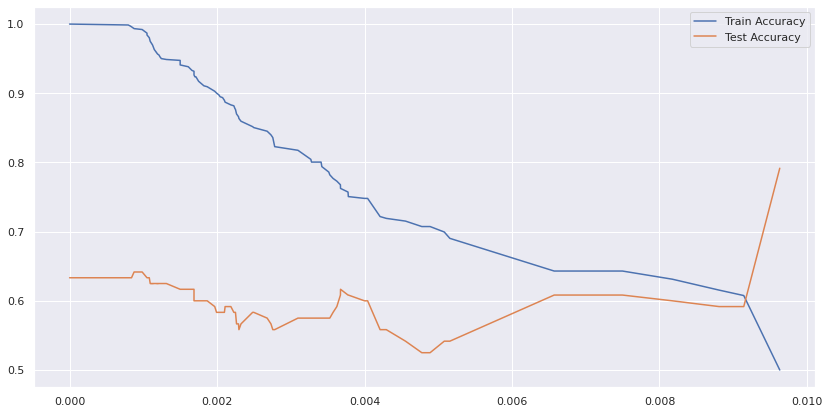

In [89]:
sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(x=alphas, y=accuracy_train, label='Train Accuracy')
sns.lineplot(x=alphas, y=accuracy_test, label='Test Accuracy');

<font color='green'>Approx. at alpha = 0.008 the training and test data accuracy are converging close.

In [90]:
dt_ccp = DecisionTreeClassifier(ccp_alpha = 0.008,max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=0)
dt_ccp.fit(X_train_smote,y_train_smote)
train_predf = dt_ccp.predict(X_train_smote)
test_predf = dt_ccp.predict(x_test)

print(accuracy_score(y_train_smote,train_predf), accuracy_score(y_test,test_predf))

0.6430446194225722 0.6083333333333333


In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

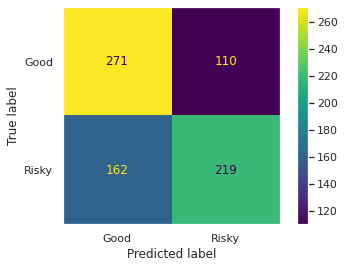

In [96]:
ConfusionMatrixDisplay.from_predictions(y_train_smote,train_predf,display_labels=y.unique())
plt.grid(False);

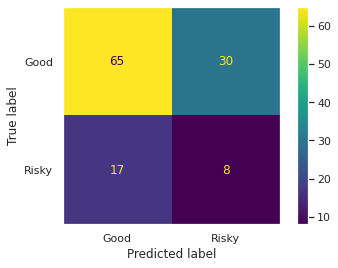

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test,test_predf,display_labels=y.unique())
plt.grid(False);

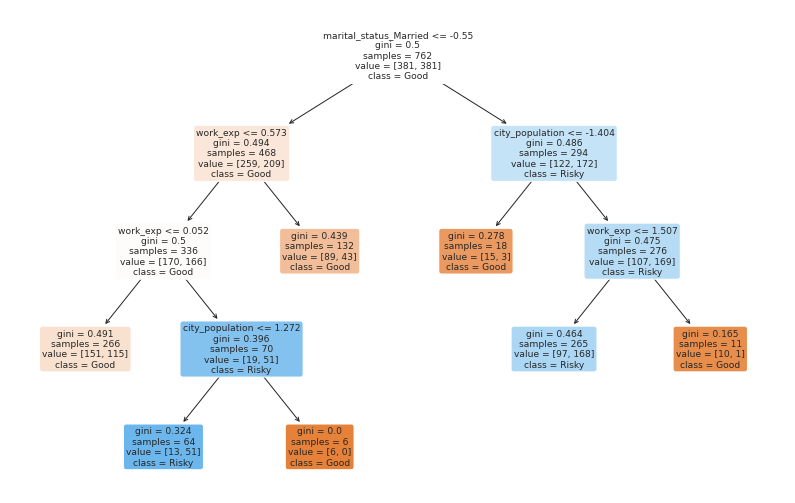

In [93]:
plt.figure(figsize=(14,9))
plot_tree(dt_ccp,feature_names=X.columns,class_names=y.unique(),filled=True,rounded=True);